In [1]:
from sklearn.datasets import make_circles

In [2]:
#Make 1000 samples
n_samples = 1000

#Create circles
X,y = make_circles(n_samples=n_samples,
                   noise= 0.03,
                   random_state=42)

In [4]:
print(f"First 5 smaples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 smaples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [6]:
# Make Dataframe of circle_data
import pandas as pd
circles = pd.DataFrame({"X1":X[:,0] ,
                        "X2":X[:,1],
                        "label":y})
circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [7]:
import matplotlib.pyplot as plt


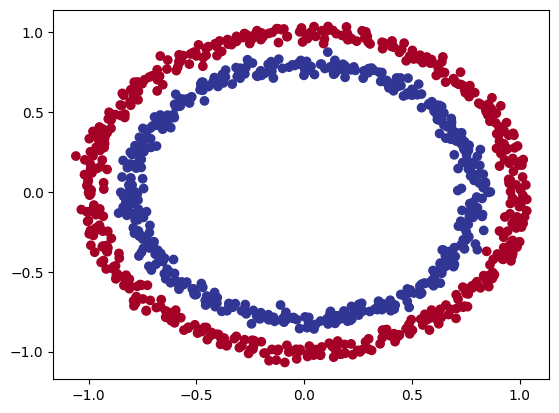

In [8]:
plt.scatter(x=X[:,0],
            y=X[:,1],
            c = y,
            cmap=plt.cm.RdYlBu)

In [11]:
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X : {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X : [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


In [13]:
# Turn data into tensors and create train and test splits
import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5],y[:5]


(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [14]:
#split data into train and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.2,
                                                 random_state=42)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

(torch.Size([800, 2]),
 torch.Size([800]),
 torch.Size([200, 2]),
 torch.Size([200]))

In [15]:
# 1) Setup device agnostic code
# 2) Construct as model(nn.Module)
# 3) Define a loss function and optimizer
# 4) Create a training and test loop


In [73]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [17]:
# Subclass nn.Module 
# create 2 nn.Linear() layers that are capable of handling the shapes of our data
# Define a forward method that outlines the forward pass pf the model
# Instantiate an instance of the class to create a model

In [67]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        #self.layer_1 = nn.Linear(in_features=2,out_features=5)
        #self.layer_2 = nn.Linear(in_features=5, out_features=1)
        self.three_linear_layers = nn.Sequential(
            nn.Linear(in_features=2,out_features=5),
            nn.ReLU(),
            nn.Linear(in_features=5,out_features=1)
        )
    def forward(self,X):
        return self.three_linear_layers(X)

model_0 = CircleModelV1().to(device)

In [53]:
model_0.state_dict()

OrderedDict([('three_linear_layers.0.weight',
              tensor([[-0.5232, -0.2738],
                      [ 0.3575,  0.5774],
                      [-0.0438,  0.4304],
                      [ 0.4616, -0.5102],
                      [-0.0363,  0.4184],
                      [ 0.3519,  0.3429],
                      [-0.3286,  0.0726],
                      [-0.3754,  0.4209],
                      [ 0.0371,  0.5758],
                      [ 0.6995, -0.5380]], device='cuda:0')),
             ('three_linear_layers.0.bias',
              tensor([-0.1974, -0.0375,  0.4506,  0.1182,  0.4423,  0.4110,  0.1996, -0.4388,
                      -0.1958,  0.3788], device='cuda:0')),
             ('three_linear_layers.2.weight',
              tensor([[-0.0177,  0.0946,  0.2009,  0.2419, -0.2241, -0.2289,  0.3072,  0.1551,
                       -0.3033, -0.1272],
                      [ 0.1402, -0.2990, -0.2409, -0.1861, -0.2457,  0.0601, -0.1864,  0.1434,
                        0.2895,  0.255

In [54]:
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions : {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples : {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions : \n {untrained_preds[:10]}")
print(f"\n First 10 labels: \n {y_test[:10]}")

Length of predictions : 200, Shape: torch.Size([200, 1])
Length of test samples : 200, Shape: torch.Size([200, 2])

First 10 predictions : 
 tensor([[-0.3374],
        [-0.3634],
        [-0.2559],
        [-0.3622],
        [-0.3052],
        [-0.3207],
        [-0.3681],
        [-0.3587],
        [-0.2528],
        [-0.3641]], device='cuda:0')

 First 10 labels: 
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0')


In [68]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.1)

In [56]:
#calculate accuracy
def accuracy_fn(y_true,y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

In [57]:
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.3374],
        [-0.3634],
        [-0.2559],
        [-0.3622],
        [-0.3052]], device='cuda:0')

In [58]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4164],
        [0.4101],
        [0.4364],
        [0.4104],
        [0.4243]], device='cuda:0')

In [59]:
torch.round(y_pred_probs)

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0')

In [81]:
X_train[:5],X_test[:2],y_train[0:1],y_test[0:2], model_0

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]], device='cuda:0'),
 tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600]], device='cuda:0'),
 tensor([1.], device='cuda:0'),
 tensor([1., 0.], device='cuda:0'),
 CircleModelV1(
   (three_linear_layers): Sequential(
     (0): Linear(in_features=2, out_features=5, bias=True)
     (1): ReLU()
     (2): Linear(in_features=5, out_features=1, bias=True)
   )
 ))

In [83]:
epochs = 500
acc_values =[]
train_loss_values =[]
test_loss_values =[]
torch.cuda.manual_seed(42)
model_0.to(device)
X_train,y_train,X_test,y_test = X_train.to(device),y_train.to(device),X_test.to(device),y_test.to(device)
for epoch in range(epochs):
    # Forward pass
    model_0.train()
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    #Caluclate loss
    loss = loss_fn(y_logits,y_train)
    acc = accuracy_fn(y_true=y_train, y_pred = y_pred)
    #optimizer zero grad
    optimizer.zero_grad()
    #loss backward
    loss.backward()
    #optimizer step
    optimizer.step()
    model_0.eval()
    with torch.inference_mode():
        y_test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(y_test_logits))
        test_loss = loss_fn(y_test_logits,y_test)
        test_acc = accuracy_fn(y_true=y_test , y_pred = test_pred)
    if epoch%10 ==0:
        print(f"Epoch: {epoch} | Train loss: {loss:.5f} | Test loss: {test_loss:.5f} | Train Acc: {acc:.2f} | Test acc: {test_acc:.2f}")

    train_loss_values.append(loss)
    test_loss_values.append(test_loss)

Epoch: 0 | Train loss: 0.40112 | Test loss: 0.44854 | Train Acc: 96.12 | Test acc: 91.50
Epoch: 10 | Train loss: 0.39806 | Test loss: 0.44566 | Train Acc: 96.38 | Test acc: 92.50
Epoch: 20 | Train loss: 0.39501 | Test loss: 0.44277 | Train Acc: 96.75 | Test acc: 92.50
Epoch: 30 | Train loss: 0.39194 | Test loss: 0.43990 | Train Acc: 96.88 | Test acc: 92.50
Epoch: 40 | Train loss: 0.38888 | Test loss: 0.43704 | Train Acc: 96.88 | Test acc: 92.50
Epoch: 50 | Train loss: 0.38582 | Test loss: 0.43415 | Train Acc: 96.88 | Test acc: 93.50
Epoch: 60 | Train loss: 0.38273 | Test loss: 0.43116 | Train Acc: 96.88 | Test acc: 93.50
Epoch: 70 | Train loss: 0.37965 | Test loss: 0.42820 | Train Acc: 96.88 | Test acc: 94.00
Epoch: 80 | Train loss: 0.37657 | Test loss: 0.42527 | Train Acc: 96.88 | Test acc: 94.50
Epoch: 90 | Train loss: 0.37351 | Test loss: 0.42235 | Train Acc: 97.00 | Test acc: 94.50
Epoch: 100 | Train loss: 0.37043 | Test loss: 0.41932 | Train Acc: 97.00 | Test acc: 94.50
Epoch: 110

In [62]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


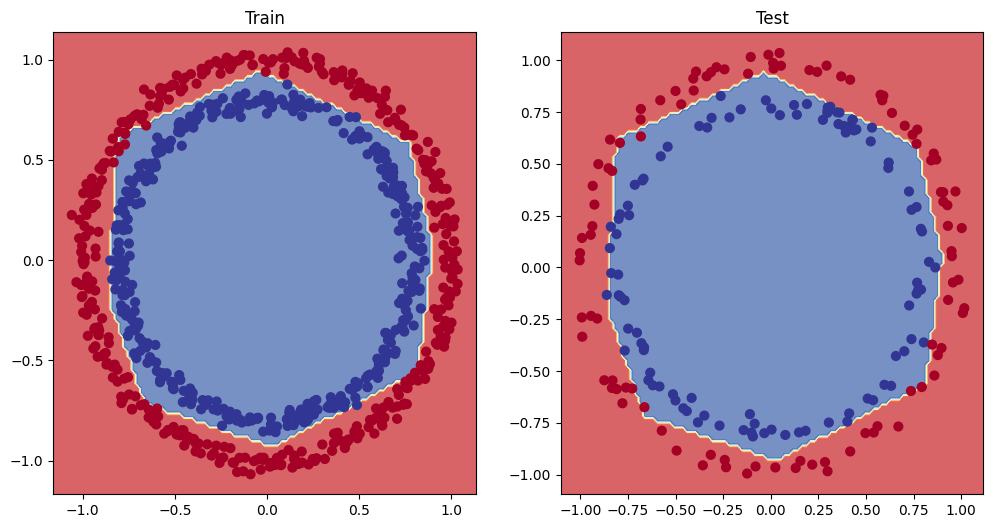

In [84]:
#Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test,y_test)

In [85]:
#Multi class classification
from sklearn.datasets import make_blobs

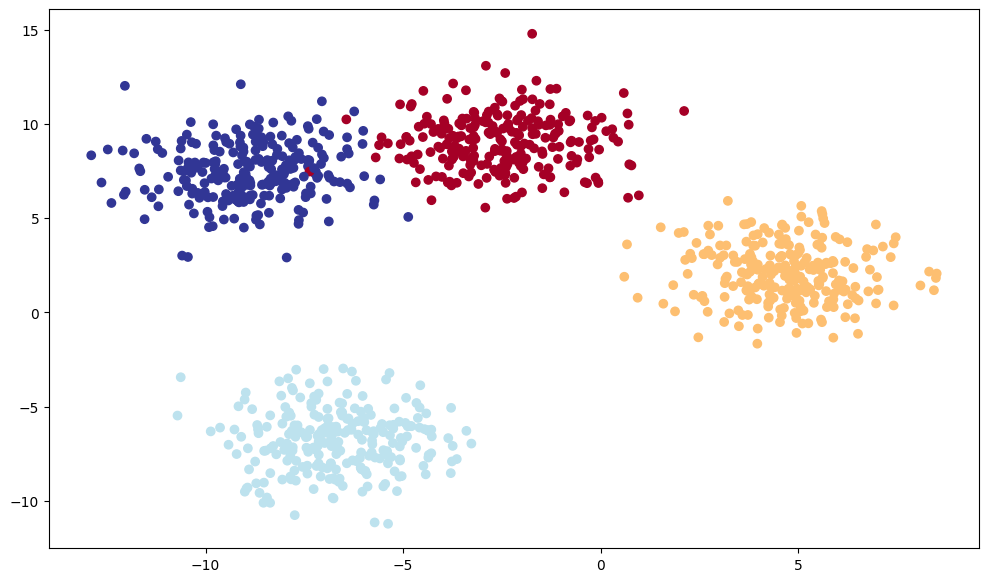

In [97]:
#set the hyperparameters for data creation
NUM_CLASSES =4
NUM_FEATURES = 2
RANDOM_SEED = 42

#Create multi class data
X_blob,y_blob = make_blobs(n_samples=1000,
                          n_features=NUM_FEATURES,
                          centers=NUM_CLASSES,
                          cluster_std =1.5,
                          random_state=RANDOM_SEED)

# Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# Split into train and test 
X_blob_train,X_blob_test,y_blob_train,y_blob_test = train_test_split(X_blob,
                                                                    y_blob,
                                                                    test_size=0.2,
                                                                    random_state= RANDOM_SEED)

#Plot data 
plt.figure(figsize=(12,7))
plt.scatter(X_blob[:,0],X_blob[:,1], c= y_blob,cmap = plt.cm.RdYlBu)

In [117]:
class BlobModel(nn.Module):
    def __init__(self, input_features, output_feature, hidden_units=8):
        """ Initializes multi-class classification
        Args:
            input_features (int): Number of input features to the model
            output_features (int): Number of output features (number of output classes)
            hidden_units (int): Number of hidden units btween layers, Default 8
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features= hidden_units),
            #nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features= hidden_units),
            #nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features= output_feature)
        )
    def forward(self,X):
        return self.linear_layer_stack(X)

blobModel_0 = BlobModel(input_features=2,
                        output_feature=4,
                       hidden_units=8).to(device)
blobModel_0

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [118]:
blob_loss_fn = nn.CrossEntropyLoss()
blob_optimizer = torch.optim.SGD(params=blobModel_0.parameters(), lr =0.1)

In [100]:
with torch.inference_mode():
    y_blob_preds = blobModel_0(X_blob_test.to(device))

y_blob_preds[:5]

tensor([[ 1.0877,  0.9308, -0.3917,  1.6423],
        [ 1.0657,  0.0225, -1.5785,  1.8445],
        [-2.8812, -1.3581,  0.1598, -2.7649],
        [ 0.1276,  0.4953, -0.1012,  0.5462],
        [ 2.3864,  1.0835, -1.3642,  3.2352]], device='cuda:0')

In [101]:
y_pred_probs = torch.softmax(y_blob_preds, dim=1)
y_pred_probs[:5]

tensor([[0.2615, 0.2235, 0.0596, 0.4554],
        [0.2776, 0.0978, 0.0197, 0.6049],
        [0.0362, 0.1660, 0.7572, 0.0406],
        [0.2101, 0.3035, 0.1671, 0.3193],
        [0.2753, 0.0748, 0.0065, 0.6434]], device='cuda:0')

In [102]:
y_preds = torch.argmax(y_pred_probs, dim =1)
y_preds[:5]

tensor([3, 3, 2, 3, 3], device='cuda:0')

In [119]:
#Fit the multi-class model to the data
torch.cuda.manual_seed(42)

epochs = 100

X_blob_train, y_blob_train, X_blob_test, y_blob_test = X_blob_train.to(device),y_blob_train.to(device),X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    blobModel_0.train()
    y_logits = blobModel_0(X_blob_train)
    y_pred = torch.softmax(y_logits, dim =1).argmax(dim=1)

    loss = blob_loss_fn(y_logits,y_blob_train)
    acc =accuracy_fn(y_pred=y_pred, y_true=y_blob_train)

    blob_optimizer.zero_grad()
    loss.backward()
    blob_optimizer.step()

    blobModel_0.eval()
    with torch.inference_mode():
        y_test_logits = blobModel_0(X_blob_test)
        y_test_pred = torch.softmax(y_test_logits, dim =1).argmax(dim=1)

        test_loss = blob_loss_fn(y_test_logits, y_blob_test)

        test_acc = accuracy_fn(y_true=y_blob_test, y_pred=y_test_pred)

    if epoch%10 ==0:
        print(f"Epoch: {epoch} | Train loss: {loss:.5f} | Test loss: {test_loss:.5f} | Train Acc: {acc:.2f} | Test acc: {test_acc:.2f}")
                                                        

Epoch: 0 | Train loss: 1.55644 | Test loss: 0.63337 | Train Acc: 14.00 | Test acc: 68.50
Epoch: 10 | Train loss: 0.17185 | Test loss: 0.15323 | Train Acc: 99.38 | Test acc: 99.50
Epoch: 20 | Train loss: 0.09183 | Test loss: 0.08352 | Train Acc: 99.25 | Test acc: 99.50
Epoch: 30 | Train loss: 0.06515 | Test loss: 0.05776 | Train Acc: 99.25 | Test acc: 99.50
Epoch: 40 | Train loss: 0.05251 | Test loss: 0.04510 | Train Acc: 99.25 | Test acc: 99.50
Epoch: 50 | Train loss: 0.04534 | Test loss: 0.03773 | Train Acc: 99.12 | Test acc: 99.50
Epoch: 60 | Train loss: 0.04080 | Test loss: 0.03296 | Train Acc: 99.12 | Test acc: 99.50
Epoch: 70 | Train loss: 0.03769 | Test loss: 0.02964 | Train Acc: 99.12 | Test acc: 99.50
Epoch: 80 | Train loss: 0.03544 | Test loss: 0.02720 | Train Acc: 99.12 | Test acc: 99.50
Epoch: 90 | Train loss: 0.03376 | Test loss: 0.02534 | Train Acc: 99.12 | Test acc: 99.50


In [114]:
blobModel_0.eval()
with torch.inference_mode():
    y_test_logits = blobModel_0(X_blob_test)
    y_test_pred = torch.softmax(y_test_logits, dim =1).argmax(dim=1)

y_test_pred[:5]

tensor([1, 3, 2, 1, 0], device='cuda:0')

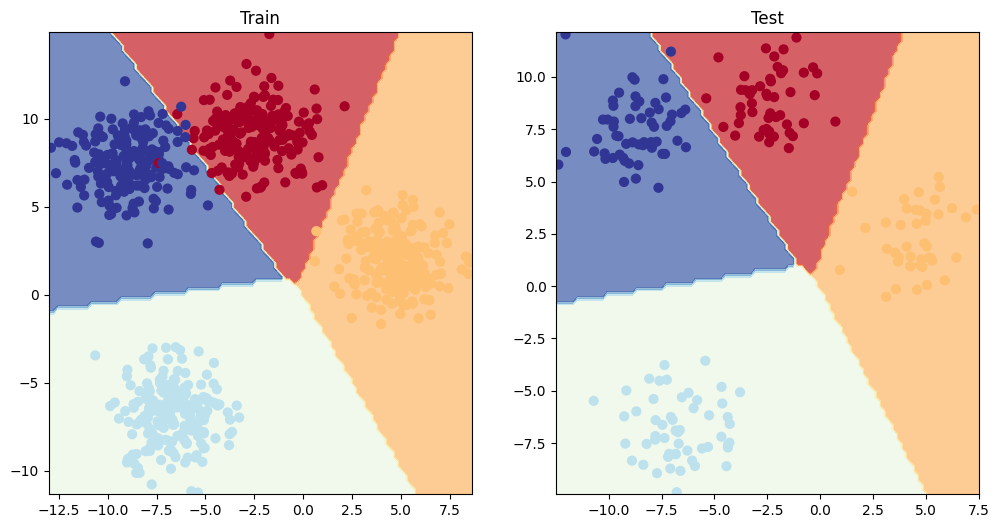

In [120]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(blobModel_0, X_blob_train,y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(blobModel_0, X_blob_test,y_blob_test)